Notebook Overview

1. Loading Python libraries
* Set paths
* Make working directory
2. Installing packages

Loading Python libraries

In [1]:
# Use pathlib for file path manipulation
import pathlib

# Install numpy
import numpy as np

# Install Pandas for tabular data
import pandas as pd

# Install plotnine: a ggplot2-compatible Python plotting package
from plotnine import *

# Always show all columns in a Pandas DataFrame
pd.set_option('display.max_columns', None)

In [2]:
# load R environment
%pip install rpy2
%load_ext rpy2.ipython

Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/tmp/Rtmp8kaB5w", R: "/tmp/Rtmp7fO9Nh"


In [20]:
%%R
install.packages("forestplot") 
library(forestplot)

* installing *source* package ‘forestplot’ ...
** package ‘forestplot’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (forestplot)


trying URL 'https://ftp.fau.de/cran/src/contrib/forestplot_3.1.7.tar.gz'
Content type 'application/x-gzip' length 209549 bytes (204 KB)
downloaded 204 KB


The downloaded source packages are in
	‘/tmp/RtmpNzBu5i/downloaded_packages’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Forest plot

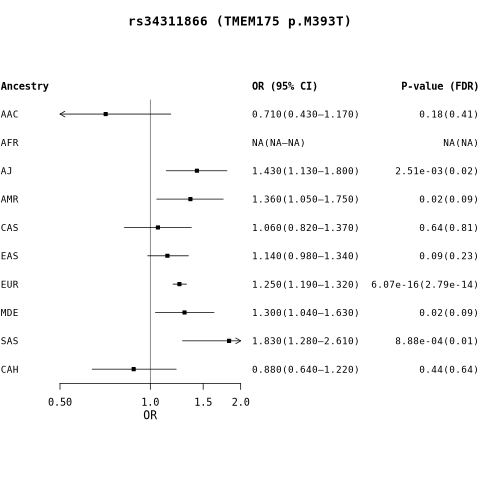

In [25]:
%%R

variant_name <- "rs34311866 (TMEM175 p.M393T)"

# --- your data ---
df <- data.frame(
  ancestry = c("AAC","AFR","AJ","AMR","CAS","EAS","EUR","MDE","SAS","CAH"),
  OR       = c(0.710, NA, 1.430, 1.360, 1.060, 1.140, 1.250, 1.300, 1.830, 0.880),
  CI_low   = c(0.430, NA, 1.130, 1.050, 0.820, 0.980, 1.190, 1.040, 1.280, 0.640),
  CI_high  = c(1.170, NA, 1.800, 1.750, 1.370, 1.340, 1.320, 1.630, 2.610, 1.220),
  p        = c(0.180, NA, 2.51e-03, 0.020, 0.640, 0.086, 6.07e-16, 0.019, 8.88e-04, 0.440),
  p_adj    = c(0.41, NA, 0.023, 0.088, 0.81, 0.23, 2.79e-14, 0.088, 0.010, 0.64)
)


# compact, no-space labels
# --- formatter function ---
fmt_p <- function(x) {
  ifelse(
    is.na(x), "NA",
    ifelse(x < 0.01,
           formatC(x, format = "e", digits = 2),   # scientific for small
           formatC(x, format = "f", digits = 2)    # fixed decimal otherwise
    )
  )
}

# apply to your labels
lab_or   <- ifelse(is.na(df$OR), "NA(NA–NA)",
                   sprintf("%.3f(%.3f–%.3f)", df$OR, df$CI_low, df$CI_high))

lab_pfdr <- sprintf("%s(%s)", fmt_p(df$p), fmt_p(df$p_adj))


# 3 columns
tabletext <- rbind(
  c("Ancestry","OR (95% CI)","P-value (FDR)"),
  cbind(df$ancestry, lab_or, lab_pfdr)
)

# add NA row for header
mean  <- c(NA, df$OR)
lower <- c(NA, df$CI_low)
upper <- c(NA, df$CI_high)

fp <- forestplot(
  labeltext = tabletext,
  mean = mean, lower = lower, upper = upper,

  graph.pos  = 2,                       # forest between OR and P-value columns
  graphwidth = unit(0.40, "npc"),       # <- wider middle panel, but stays proportional so text never disappears
  colgap     = unit(4, "mm"),         # <- tiny gap: packs columns tightly
  lineheight = unit(10, "mm"),         # <- denser rows

  align = c("l","l","r"),               # ancestry left; numeric columns right-aligned
  is.summary  = c(TRUE, rep(FALSE, nrow(df))),
  boxsize     = 0.12,
  line.margin = 0.06,
  clip        = c(0.5, 2.0),
  xlog        = TRUE, zero = 1, 
  xticks      = c(0.5, 1.0, 1.5, 2.0),
  col = fpColors(box = "black", line = "black", zero = "grey40"),
  lty.zero = 3,
  title = variant_name,
  txt_gp = fpTxtGp(
    label = gpar(fontfamily = "mono", cex = 0.78),  # small mono font = compact & aligned numbers
    ticks  = gpar(cex = 0.85),
    xlab   = gpar(cex = 0.95),
    title  = gpar(fontface = "bold", cex = 1.05)
  ),
  xlab = "OR",
  new_page = TRUE
)

fp

In [26]:
%%R

# 1) pick your folder
out_dir <- "/home/jupyter/workspace/ws_files/revision/"     # <-- change to your folder
dir.create(out_dir, recursive = TRUE, showWarnings = FALSE)

# 2) file name
png_path <- file.path(out_dir, "rs34311866.png")

# 3) open device → print(fp) → close
png(png_path, width = 3000, height = 1600, res = 300, bg = "white", type = "cairo")
print(fp)                              # <-- IMPORTANT
dev.off()

cat("Saved:", normalizePath(png_path), "\n")

Saved: /home/jupyter/workspace/ws_files/revision/rs34311866.png 


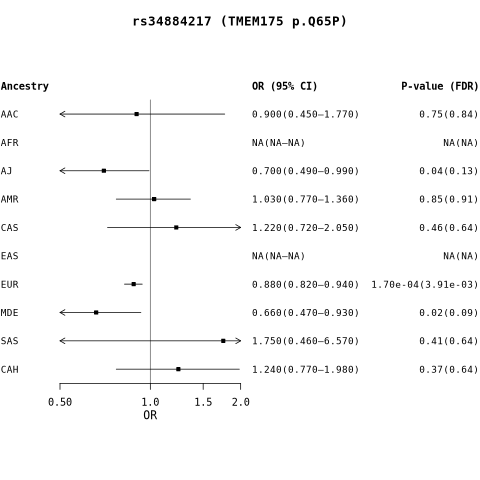

In [27]:
%%R

variant_name <- "rs34884217 (TMEM175 p.Q65P)"

# --- your data ---
df <- data.frame(
  ancestry = c("AAC","AFR","AJ","AMR","CAS","EAS","EUR", "MDE","SAS","CAH"),
  OR       = c(0.90, NA, 0.70, 1.03, 1.22, NA, 0.88, 0.66, 1.75, 1.24),
  CI_low   = c(0.45, NA, 0.49, 0.77, 0.72, NA, 0.82, 0.47, 0.46, 0.77),
  CI_high  = c(1.77, NA, 0.99, 1.36, 2.05, NA, 0.94, 0.93, 6.57, 1.98),
  p        = c(0.75, NA, 0.042, 0.85, 0.46, NA, 1.70e-04, 0.019, 0.41, 0.37),
  p_adj    = c(0.84, NA, 0.13, 0.91, 0.64, NA, 3.91e-03, 0.088, 0.64, 0.64)
)


# compact, no-space labels
# --- formatter function ---
fmt_p <- function(x) {
  ifelse(
    is.na(x), "NA",
    ifelse(x < 0.01,
           formatC(x, format = "e", digits = 2),   # scientific for small
           formatC(x, format = "f", digits = 2)    # fixed decimal otherwise
    )
  )
}

# apply to your labels
lab_or   <- ifelse(is.na(df$OR), "NA(NA–NA)",
                   sprintf("%.3f(%.3f–%.3f)", df$OR, df$CI_low, df$CI_high))

lab_pfdr <- sprintf("%s(%s)", fmt_p(df$p), fmt_p(df$p_adj))


# 3 columns
tabletext <- rbind(
  c("Ancestry","OR (95% CI)","P-value (FDR)"),
  cbind(df$ancestry, lab_or, lab_pfdr)
)

# add NA row for header
mean  <- c(NA, df$OR)
lower <- c(NA, df$CI_low)
upper <- c(NA, df$CI_high)

fp <- forestplot(
  labeltext = tabletext,
  mean = mean, lower = lower, upper = upper,

  graph.pos  = 2,                       # forest between OR and P-value columns
  graphwidth = unit(0.40, "npc"),       # <- wider middle panel, but stays proportional so text never disappears
  colgap     = unit(4, "mm"),         # <- tiny gap: packs columns tightly
  lineheight = unit(10, "mm"),         # <- denser rows

  align = c("l","l","r"),               # ancestry left; numeric columns right-aligned
  is.summary  = c(TRUE, rep(FALSE, nrow(df))),
  boxsize     = 0.12,
  line.margin = 0.06,
  clip        = c(0.5, 2.0),
  xlog        = TRUE, zero = 1, 
  xticks      = c(0.5, 1.0, 1.5, 2.0),
  col = fpColors(box = "black", line = "black", zero = "grey40"),
  lty.zero = 3,
  title = variant_name,
  txt_gp = fpTxtGp(
    label = gpar(fontfamily = "mono", cex = 0.78),  # small mono font = compact & aligned numbers
    ticks  = gpar(cex = 0.85),
    xlab   = gpar(cex = 0.95),
    title  = gpar(fontface = "bold", cex = 1.05)
  ),
  xlab = "OR",
  new_page = TRUE
)
fp

In [28]:
%%R

# 1) pick your folder
out_dir <- "/home/jupyter/workspace/ws_files/revision/"     # <-- change to your folder
dir.create(out_dir, recursive = TRUE, showWarnings = FALSE)

# 2) file name
png_path <- file.path(out_dir, "rs34884217.png")

# 3) open device → print(fp) → close
png(png_path, width = 3000, height = 1600, res = 300, bg = "white", type = "cairo")
print(fp)                              # <-- IMPORTANT
dev.off()

cat("Saved:", normalizePath(png_path), "\n")

Saved: /home/jupyter/workspace/ws_files/revision/rs34884217.png 


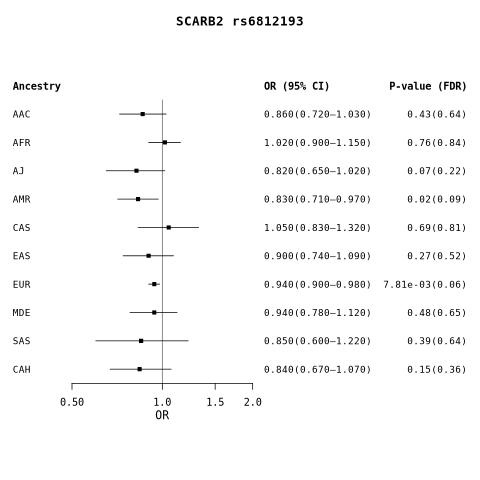

In [29]:
%%R

variant_name <- "SCARB2 rs6812193"

# --- your data ---
df <- data.frame(
  ancestry = c("AAC","AFR","AJ","AMR","CAS","EAS","EUR","MDE","SAS","CAH"),
  OR       = c(0.86, 1.02, 0.82, 0.83, 1.05, 0.90, 0.94, 0.94, 0.85, 0.84),
  CI_low   = c(0.72, 0.90, 0.65, 0.71, 0.83, 0.74, 0.90, 0.78, 0.60, 0.67),
  CI_high  = c(1.03, 1.15, 1.02, 0.97, 1.32, 1.09, 0.98, 1.12, 1.22, 1.07),
  p        = c(0.43, 0.76, 0.075, 0.020, 0.69, 0.27, 7.81e-03, 0.48, 0.39, 0.15),
  p_adj    = c(0.64, 0.84, 0.22, 0.088, 0.81, 0.52, 0.060, 0.65, 0.64, 0.36)
)


# compact, no-space labels
# --- formatter function ---
fmt_p <- function(x) {
  ifelse(
    is.na(x), "NA",
    ifelse(x < 0.01,
           formatC(x, format = "e", digits = 2),   # scientific for small
           formatC(x, format = "f", digits = 2)    # fixed decimal otherwise
    )
  )
}

# apply to your labels
lab_or   <- ifelse(is.na(df$OR), "NA(NA–NA)",
                   sprintf("%.3f(%.3f–%.3f)", df$OR, df$CI_low, df$CI_high))

lab_pfdr <- sprintf("%s(%s)", fmt_p(df$p), fmt_p(df$p_adj))


# 3 columns
tabletext <- rbind(
  c("Ancestry","OR (95% CI)","P-value (FDR)"),
  cbind(df$ancestry, lab_or, lab_pfdr)
)

# add NA row for header
mean  <- c(NA, df$OR)
lower <- c(NA, df$CI_low)
upper <- c(NA, df$CI_high)

fp <- forestplot(
  labeltext = tabletext,
  mean = mean, lower = lower, upper = upper,

  graph.pos  = 2,                       # forest between OR and P-value columns
  graphwidth = unit(0.40, "npc"),       # <- wider middle panel, but stays proportional so text never disappears
  colgap     = unit(4, "mm"),         # <- tiny gap: packs columns tightly
  lineheight = unit(10, "mm"),         # <- denser rows

  align = c("l","l","r"),               # ancestry left; numeric columns right-aligned
  is.summary  = c(TRUE, rep(FALSE, nrow(df))),
  boxsize     = 0.12,
  line.margin = 0.06,
  clip        = c(0.5, 2.0),
  xlog        = TRUE, zero = 1, 
  xticks      = c(0.5, 1.0, 1.5, 2.0),
  col = fpColors(box = "black", line = "black", zero = "grey40"),
  title = variant_name,
  txt_gp = fpTxtGp(
    label = gpar(fontfamily = "mono", cex = 0.78),  # small mono font = compact & aligned numbers
    ticks  = gpar(cex = 0.85),
    xlab   = gpar(cex = 0.95),
    title  = gpar(fontface = "bold", cex = 1.05)
  ),
  xlab = "OR",
  new_page = TRUE
)
fp

In [30]:
%%R

# 1) pick your folder
out_dir <- "/home/jupyter/workspace/ws_files/revision/"     # <-- change to your folder
dir.create(out_dir, recursive = TRUE, showWarnings = FALSE)

# 2) file name
png_path <- file.path(out_dir, "rs6812193.png")

# 3) open device → print(fp) → close
png(png_path, width = 3000, height = 1600, res = 300, bg = "white", type = "cairo")
print(fp)                              # <-- IMPORTANT
dev.off()

cat("Saved:", normalizePath(png_path), "\n")

Saved: /home/jupyter/workspace/ws_files/revision/rs6812193.png 


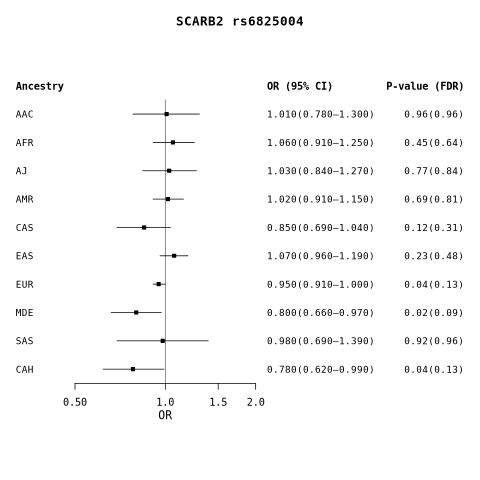

In [31]:
%%R

variant_name <- "SCARB2 rs6825004"

# --- your data ---
df <- data.frame(
  ancestry = c("AAC","AFR","AJ","AMR","CAS","EAS","EUR","MDE","SAS","CAH"),
  OR       = c(1.01, 1.06, 1.03, 1.02, 0.85, 1.07, 0.95, 0.80, 0.98, 0.78),
  CI_low   = c(0.78, 0.91, 0.84, 0.91, 0.69, 0.96, 0.91, 0.66, 0.69, 0.62),
  CI_high  = c(1.30, 1.25, 1.27, 1.15, 1.04, 1.19, 1.00, 0.97, 1.39, 0.99),
  p        = c(0.96, 0.45, 0.77, 0.69, 0.12, 0.23, 0.036, 0.023, 0.92, 0.042),
  p_adj    = c(0.96, 0.64, 0.84, 0.81, 0.31, 0.48, 0.13, 0.088, 0.96, 0.13)
)


# compact, no-space labels
# --- formatter function ---
fmt_p <- function(x) {
  ifelse(
    is.na(x), "NA",
    ifelse(x < 0.01,
           formatC(x, format = "e", digits = 2),   # scientific for small
           formatC(x, format = "f", digits = 2)    # fixed decimal otherwise
    )
  )
}

# apply to your labels
lab_or   <- ifelse(is.na(df$OR), "NA(NA–NA)",
                   sprintf("%.3f(%.3f–%.3f)", df$OR, df$CI_low, df$CI_high))

lab_pfdr <- sprintf("%s(%s)", fmt_p(df$p), fmt_p(df$p_adj))


# 3 columns
tabletext <- rbind(
  c("Ancestry","OR (95% CI)","P-value (FDR)"),
  cbind(df$ancestry, lab_or, lab_pfdr)
)

# add NA row for header
mean  <- c(NA, df$OR)
lower <- c(NA, df$CI_low)
upper <- c(NA, df$CI_high)

fp <- forestplot(
  labeltext = tabletext,
  mean = mean, lower = lower, upper = upper,

  graph.pos  = 2,                       # forest between OR and P-value columns
  graphwidth = unit(0.40, "npc"),       # <- wider middle panel, but stays proportional so text never disappears
  colgap     = unit(4, "mm"),         # <- tiny gap: packs columns tightly
  lineheight = unit(10, "mm"),         # <- denser rows

  align = c("l","l","r"),               # ancestry left; numeric columns right-aligned
  is.summary  = c(TRUE, rep(FALSE, nrow(df))),
  boxsize     = 0.12,
  line.margin = 0.06,
  clip        = c(0.5, 2.0),
  xlog        = TRUE, zero = 1, 
  xticks      = c(0.5, 1.0, 1.5, 2.0),
  col = fpColors(box = "black", line = "black", zero = "grey40"),
  title = variant_name,
  txt_gp = fpTxtGp(
    label = gpar(fontfamily = "mono", cex = 0.78),  # small mono font = compact & aligned numbers
    ticks  = gpar(cex = 0.85),
    xlab   = gpar(cex = 0.95),
    title  = gpar(fontface = "bold", cex = 1.05)
  ),
  xlab = "OR",
  new_page = TRUE
)
fp

In [32]:
%%R

# 1) pick your folder
out_dir <- "/home/jupyter/workspace/ws_files/revision/"     # <-- change to your folder
dir.create(out_dir, recursive = TRUE, showWarnings = FALSE)

# 2) file name
png_path <- file.path(out_dir, "rs6825004.png")

# 3) open device → print(fp) → close
png(png_path, width = 3000, height = 1600, res = 300, bg = "white", type = "cairo")
print(fp)                              # <-- IMPORTANT
dev.off()

cat("Saved:", normalizePath(png_path), "\n")

Saved: /home/jupyter/workspace/ws_files/revision/rs6825004.png 


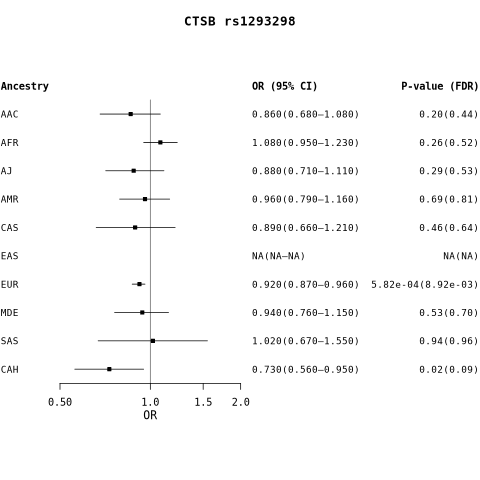

In [33]:
%%R

variant_name <- "CTSB rs1293298"

# --- your data ---
df <- data.frame(
  ancestry = c("AAC","AFR","AJ","AMR","CAS","EAS","EUR","MDE","SAS","CAH"),
  OR       = c(0.86, 1.08, 0.88, 0.96, 0.89, NA, 0.92, 0.94, 1.02, 0.73),
  CI_low   = c(0.68, 0.95, 0.71, 0.79, 0.66, NA, 0.87, 0.76, 0.67, 0.56),
  CI_high  = c(1.08, 1.23, 1.11, 1.16, 1.21, NA, 0.96, 1.15, 1.55, 0.95),
  p        = c(0.20, 0.26, 0.29, 0.69, 0.46, NA, 5.82e-04, 0.53, 0.94, 0.021),
  p_adj    = c(0.44, 0.52, 0.53, 0.81, 0.64, NA, 8.92e-03, 0.70, 0.96, 0.088)
)


# compact, no-space labels
# --- formatter function ---
fmt_p <- function(x) {
  ifelse(
    is.na(x), "NA",
    ifelse(x < 0.01,
           formatC(x, format = "e", digits = 2),   # scientific for small
           formatC(x, format = "f", digits = 2)    # fixed decimal otherwise
    )
  )
}

# apply to your labels
lab_or   <- ifelse(is.na(df$OR), "NA(NA–NA)",
                   sprintf("%.3f(%.3f–%.3f)", df$OR, df$CI_low, df$CI_high))

lab_pfdr <- sprintf("%s(%s)", fmt_p(df$p), fmt_p(df$p_adj))


# 3 columns
tabletext <- rbind(
  c("Ancestry","OR (95% CI)","P-value (FDR)"),
  cbind(df$ancestry, lab_or, lab_pfdr)
)

# add NA row for header
mean  <- c(NA, df$OR)
lower <- c(NA, df$CI_low)
upper <- c(NA, df$CI_high)

fp <- forestplot(
  labeltext = tabletext,
  mean = mean, lower = lower, upper = upper,

  graph.pos  = 2,                       # forest between OR and P-value columns
  graphwidth = unit(0.40, "npc"),       # <- wider middle panel, but stays proportional so text never disappears
  colgap     = unit(4, "mm"),         # <- tiny gap: packs columns tightly
  lineheight = unit(10, "mm"),         # <- denser rows

  align = c("l","l","r"),               # ancestry left; numeric columns right-aligned
  is.summary  = c(TRUE, rep(FALSE, nrow(df))),
  boxsize     = 0.12,
  line.margin = 0.06,
  clip        = c(0.5, 2.0),
  xlog        = TRUE, zero = 1, 
  xticks      = c(0.5, 1.0, 1.5, 2.0),
  col = fpColors(box = "black", line = "black", zero = "grey40"),
  title = variant_name,
  txt_gp = fpTxtGp(
    label = gpar(fontfamily = "mono", cex = 0.78),  # small mono font = compact & aligned numbers
    ticks  = gpar(cex = 0.85),
    xlab   = gpar(cex = 0.95),
    title  = gpar(fontface = "bold", cex = 1.05)
  ),
  xlab = "OR",
  new_page = TRUE
)
fp

In [34]:
%%R

# 1) pick your folder
out_dir <- "/home/jupyter/workspace/ws_files/revision/"     # <-- change to your folder
dir.create(out_dir, recursive = TRUE, showWarnings = FALSE)

# 2) file name
png_path <- file.path(out_dir, "rs1293298.png")

# 3) open device → print(fp) → close
png(png_path, width = 3000, height = 1600, res = 300, bg = "white", type = "cairo")
print(fp)                              # <-- IMPORTANT
dev.off()

cat("Saved:", normalizePath(png_path), "\n")

Saved: /home/jupyter/workspace/ws_files/revision/rs1293298.png 


Multiple test correction

In [4]:
%%R
pvals_table1 <- c(0.18, NA, 2.51e-03, 0.02, 0.64, 0.086, 6.07e-16, 0.019, 8.88e-04, 0.44, 0.75, NA, 0.042, 0.85, 0.46, NA, 1.70e-04, 0.019, 0.41, 0.37, 0.43, 0.76, 0.075,0.02, 0.69,0.27,7.81e-03, 0.48, 0.39, 0.15,0.96, 0.45,0.77, 0.69, 0.12, 0.23, 0.036, 0.023, 0.92, 0.042,0.20,0.26,0.29,0.69,0.46, NA,5.82e-04,0.53,0.94,0.021) 
pvals_fdr_table1 <- p.adjust(pvals_table1, method = "BH")
pvals_fdr_table1

 [1] 4.140000e-01           NA 2.309200e-02 8.781818e-02 8.138462e-01
 [6] 2.327059e-01 2.792200e-14 8.781818e-02 1.021200e-02 6.412121e-01
[11] 8.433333e-01           NA 1.288000e-01 9.093023e-01 6.412121e-01
[16]           NA 3.910000e-03 8.781818e-02 6.412121e-01 6.412121e-01
[21] 6.412121e-01 8.433333e-01 2.156250e-01 8.781818e-02 8.138462e-01
[26] 5.175000e-01 5.987667e-02 6.494118e-01 6.412121e-01 3.631579e-01
[31] 9.600000e-01 6.412121e-01 8.433333e-01 8.138462e-01 3.066667e-01
[36] 4.809091e-01 1.273846e-01 8.816667e-02 9.600000e-01 1.288000e-01
[41] 4.380952e-01 5.175000e-01 5.336000e-01 8.138462e-01 6.412121e-01
[46]           NA 8.924000e-03 6.965714e-01 9.600000e-01 8.781818e-02


In [154]:
%%R
pvals_table3 <- c(0.63, 0.52, 0.74, 0.74, 0.75, 0.58, 0.62, 0.83, 0.18, 0.26, 0.86, 0.40, 0.41, 0.86, NA, NA, 0.42, 0.066, 0.52, 0.55, 0.64, 0.43, 1.87e-03, 0.05, 0.78, 0.28, 0.021, NA, 0.85, 0.50, 0.13, 0.091, 0.024, 0.019, 0.52, 0.54, NA, NA, 1, 1, 0.29, 0.15, 1, 1, 0.75, 0.28, 0.83, 0.15, 0.73, 0.88, 0.75, 0.47, 0.86, 0.76, 1, 0.54, 0.57, 0.56, NA, NA, 0.40, 0.57, 0.42, 0.64, 0.73, 0.82) 
pvals_fdr_table3 <- p.adjust(pvals_table3, method = "BH")
pvals_fdr_table3

 [1] 0.9573585 0.9573585 0.9573585 0.9573585 0.9573585 0.9573585 0.9573585
 [8] 0.9573585 0.9573585 0.9573585 0.9573585 0.9573585 0.9573585 0.9573585
[15]        NA        NA 0.9573585 0.6490000 0.9573585 0.9573585 0.9573585
[22] 0.9573585 0.1103300 0.5900000 0.9573585 0.9573585 0.3540000        NA
[29] 0.9573585 0.9573585 0.8850000 0.7670000 0.3540000 0.3540000 0.9573585
[36] 0.9573585        NA        NA 1.0000000 1.0000000 0.9573585 0.8850000
[43] 1.0000000 1.0000000 0.9573585 0.9573585 0.9573585 0.8850000 0.9573585
[50] 0.9614815 0.9573585 0.9573585 0.9573585 0.9573585 1.0000000 0.9573585
[57] 0.9573585 0.9573585        NA        NA 0.9573585 0.9573585 0.9573585
[64] 0.9573585 0.9573585 0.9573585


In [7]:
# gather p vlaues from 10 ancestries

# list of ancestries
ancestries = ['AAC','AFR','AJ','AMR','CAS','EAS','EUR','MDE','SAS','CAH']

# dictionary to hold pvalue vectors
pvalues_dict = {}

for ancestry in ancestries:
    file = f'/home/jupyter/workspace/ws_files/SCARB2/SCARB2_{ancestry}/{ancestry}_SCARB2.burdenTESTSV.exonic.SingleScore.assoc.csv'
    
    # read file
    df = pd.read_csv(file)
    
    # drop duplicates based on variant identifier
    if {"CHROM","POS","REF","ALT"}.issubset(df.columns):
        df["variant_id"] = df["CHROM"].astype(str) + ":" + df["POS"].astype(str) + ":" + df["REF"] + ":" + df["ALT"]
        df = df.drop_duplicates(subset="variant_id")
    else:
        df = df.drop_duplicates()
    
    # extract PVAL column as a Series
    pvalues_dict[ancestry] = df["PVALUE"].values

# now gather all as a vector (concatenate)
pvalues_scarb2 = pd.concat([pd.Series(v) for v in pvalues_dict.values()], ignore_index=True)

print(pvalues_scarb2)

0      0.724773
1      0.883253
2           NaN
3           NaN
4      0.000685
         ...   
180    0.766711
181    0.862643
182         NaN
183         NaN
184    0.555506
Length: 185, dtype: float64


In [9]:
# make sure it's a plain numpy array
pvals_np = pvalues_scarb2.values

In [10]:
%%R -i pvals_np
pvals_fdr_table4 <- p.adjust(pvals_np, method = "BH")
pvals_fdr_table4

  [1] 9.976500e-01 9.976500e-01          NaN          NaN 1.945471e-02
  [6] 7.644726e-06 9.976500e-01 2.915118e-02 9.976500e-01 9.976500e-01
 [11] 1.883871e-01 9.976500e-01 9.976500e-01          NaN 9.976500e-01
 [16] 9.976500e-01 9.976500e-01 7.493293e-05 9.976500e-01 9.976500e-01
 [21] 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01
 [26]          NaN 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01
 [31] 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01
 [36] 9.976500e-01 9.976500e-01          NaN 9.976500e-01          NaN
 [41] 3.258016e-01          NaN          NaN 9.976500e-01 7.537512e-01
 [46]          NaN          NaN 9.976500e-01 9.976500e-01 9.976500e-01
 [51] 9.976500e-01 1.731576e-02          NaN 9.976500e-01 9.976500e-01
 [56] 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01 9.976500e-01
 [61] 9.976500e-01          NaN 9.976500e-01          NaN 9.976500e-01
 [66]          NaN          NaN 9.647622e-01 8.807708e-01 9.976500e-01
 [71] 